- Nama : Muhammad Ilham
- email : mhilham987@gmail.com
- ID Dicoding : mhilham987

#Library Initiation and Data

In [ ]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip rockpaperscissors.zip


base_dir = 'rockpaperscissors/rps-cv-images'
train_dir = 'rockpaperscissors/train'
validation_dir = 'rockpaperscissors/validation'

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM

#Training Model

In [ ]:
image_datagen = ImageDataGenerator(
     rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
    validation_split=0.4  # 40% validation set
)

train_generator = image_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = image_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: rock, paper, scissors
])


model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
import time
import threading

class TimerCallback(tf.keras.callbacks.Callback):
    def __init__(self, max_seconds):
        self.max_seconds = max_seconds
        self.timer_thread = None
        self.early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

    def on_train_begin(self, logs=None):
        self.start_time = time.time()
        self.timer_thread = threading.Thread(target=self.check_time)
        self.timer_thread.start()

    def on_epoch_end(self, epoch, logs=None):
        pass

    def check_time(self):
        while True:
            elapsed_time = time.time() - self.start_time
            if elapsed_time > self.max_seconds:
                self.model.stop_training = True
                print(f"\nTraining stopped after {elapsed_time:.2f} seconds.")
                break
            time.sleep(5)  # Check every 5 seconds


early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1,
                               mode='min', restore_best_weights=True)

timer_callback = TimerCallback(max_seconds=30*60)  # 30 Minute Timer

#Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=100,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[timer_callback]
)


accuracy = history.history['accuracy'][-1] * 100
print(f'Accuracy model: {accuracy:.2f}%')

Epoch 1/100
42/42 [==============================] - 97s 2s/step - loss: 1.3210 - accuracy: 0.3623 - val_loss: 1.2219 - val_accuracy: 0.3238
Epoch 2/100
42/42 [==============================] - 92s 2s/step - loss: 1.0868 - accuracy: 0.4094 - val_loss: 1.0492 - val_accuracy: 0.4359
Epoch 3/100
42/42 [==============================] - 96s 2s/step - loss: 1.0027 - accuracy: 0.5388 - val_loss: 0.7882 - val_accuracy: 0.6762
Epoch 4/100
42/42 [==============================] - 97s 2s/step - loss: 0.7518 - accuracy: 0.6842 - val_loss: 0.6388 - val_accuracy: 0.7689
Epoch 5/100
42/42 [==============================] - 95s 2s/step - loss: 0.5750 - accuracy: 0.7839 - val_loss: 0.5137 - val_accuracy: 0.7906
Epoch 6/100
42/42 [==============================] - 95s 2s/step - loss: 0.4848 - accuracy: 0.8135 - val_loss: 0.5158 - val_accuracy: 0.8021
Epoch 7/100
42/42 [==============================] - 95s 2s/step - loss: 0.4239 - accuracy: 0.8311 - val_loss: 0.3994 - val_accuracy: 0.8478
Epoch 8/100
4

#Model Test

Saving 1701355603820.jpg to 1701355603820 (2).jpg
1/1 [==============================] - 0s 42ms/step
1701355603820 (2).jpg
Prediksi: scissors


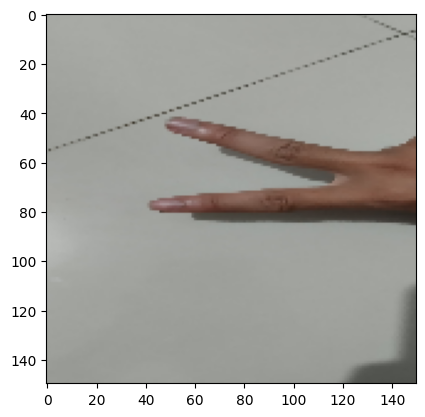

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)

  prediction = model.predict(img)
  class_index = np.argmax(prediction)
  classes = ['scissors','rock', 'paper']
  #classes = model.predict(images, batch_size=10)
  predicted_class = classes[class_index]
  print(fn)
  print(f'Prediksi: {predicted_class}')
